In [1]:
from gnomepy.backtest.backtest import *
from gnomepy.backtest.strategy import *
from gnomepy.backtest.archive.signal import *
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import numpy as np
import multiprocessing as mp
from gnomepy.backtest.coint_testing import *
from IPython.display import display
import pandas as pd

### Testing Cointegration Strategies

#### Load in Data from Client

In [2]:
strat = CointegrationStrategy(
    basket=[(1,1), (1,10), (1,3), (1,7), (1,8), (1,9)],
    data_schema_type=SchemaType.MBP_10,
    trade_frequency=30,
    beta_refresh_frequency=10000,
    spread_window=5000,
    enter_zscore=2.0,
    exit_zscore=0.1,
    stop_loss_delta=0,
    retest_cointegration=True,
    use_extends=False,
    use_lob=False,
    use_dynamic_sizing=True
)

start_datetime = datetime.datetime(2025, 6, 18)
end_datetime = datetime.datetime(2025, 6, 22)
history_df, trade_log = strat.backtest(notional=100, cash_start=10000, start_datetime=start_datetime, end_datetime=end_datetime)
summary, trade_log = strat.process_backtest(history_df=history_df, trade_log=trade_log, params={})

In [3]:
summary

{'num_complete_trades': 7,
 'avg_profit_per_complete_trade': np.float64(-0.4742831533136008),
 'std_profit_per_complete_trade': np.float64(0.5938589858831849),
 'total_profit': np.float64(-3.319982073195206),
 'avg_ticks_per_complete_trade': np.float64(1662.142857142857),
 'std_ticks_per_complete_trade': np.float64(1917.2485866097654),
 'avg_extends_per_complete_trade': np.float64(0.0),
 'std_extends_per_complete_trade': np.float64(0.0),
 'win_ratio': 0.2857142857142857,
 'max_drawdown': np.float64(-3.3215441062020545),
 'profit_factor': np.float64(0.09822237114833479),
 'sharpe_ratio': np.float64(-10.927543914715406),
 'profit_to_drawdown': np.float64(-0.9995297268508547)}

In [8]:
trade_log[trade_log['action'].str.contains("exit")]

,step,timestampEvent,last_beta_vector_refresh,action,before_cash,after_cash,price_vector,before_position,after_position,before_position_value,after_position_value,z_score,ticks_since_entry,extends_since_entry,scaled_notional,level_fills,cash_delta,pl
122,10309,2025-06-19 00:35:13.075,2025-06-19 00:03:09.620,exit_long,-1898.505069,-4175.767038,"[105053.0, 0.010462, 147.72, 2.8569, 0.60918, ...","[1.5261550637263438e-08, 1394928.4711070687, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",12081.449876,0.0,0.293134,423,121,NaN,"[{'exchange': 1, 'security': 1, 'fills': [{'le...",-2277.261969,-14175.767038
512,12071,2025-06-19 03:57:33.762,2025-06-19 00:03:09.620,exit_long,-42891.064933,-47583.547677,"[104980.0, 0.010336, 146.62, 2.8423, 0.60186, ...","[4.9898138366625035e-08, 4549249.238293413, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",38844.246994,0.0,-0.098494,1797,388,NaN,"[{'exchange': 1, 'security': 1, 'fills': [{'le...",-4692.482744,-43407.780639
560,12559,2025-06-19 05:06:03.865,2025-06-19 00:03:09.620,exit_long,-51618.834611,-52254.863369,"[105128.0, 0.0104, 147.02, 2.8437, 0.60715, 0....","[5.170819201361359e-09, 474094.2604517113, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",4082.183781,0.0,0.181874,395,46,NaN,"[{'exchange': 1, 'security': 1, 'fills': [{'le...",-636.028758,-4671.315692
1136,15791,2025-06-19 13:14:51.629,2025-06-19 00:03:09.620,exit_short,13884.957258,18535.399986,"[104594.0, 0.010405, 144.92, 2.7999, 0.59812, ...","[-8.519177174461364e-08, -7693866.816437575, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-66136.505297,0.0,0.044416,1831,574,NaN,"[{'exchange': 1, 'security': 1, 'fills': [{'le...",4650.442728,70790.263355
1367,19280,2025-06-19 18:08:14.473,2025-06-19 00:03:09.620,exit_long,-1998.815282,-5613.936394,"[104644.0, 0.010404, 145.65, 2.8538, 0.6006, 0...","[2.6501226109037025e-08, 2426717.1057889853, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",20882.934293,0.0,-0.082916,2755,229,NaN,"[{'exchange': 1, 'security': 1, 'fills': [{'le...",-3615.121112,-24149.336380
1499,20952,2025-06-19 21:39:08.043,2025-06-19 19:27:35.058,exit_short,-26323.117930,-23012.253961,"[104201.0, 0.01025, 145.53, 2.8309, 0.6002, 0....","[-3.893830618092285e-08, 1711747.4874001353, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",20689.673194,0.0,-0.305953,337,130,NaN,"[{'exchange': 1, 'security': 1, 'fills': [{'le...",3310.863969,-17398.317567
3892,26581,2025-06-20 07:34:14.088,2025-06-19 19:27:35.058,exit_short,-358604.659656,-347698.868759,"[105250.0, 0.010373, 146.64, 2.8185, 0.59974, ...","[-6.297401368055915e-07, 27898818.850575417, -...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",340442.350439,0.0,0.044215,7976,2391,NaN,"[{'exchange': 1, 'security': 1, 'fills': [{'le...",10905.790897,-324686.614798


In [6]:
strat = CointegrationStrategy(
    basket=[(1,1), (1,10), (1,3), (1,7), (1,8), (1,9)],
    data_schema_type=SchemaType.MBP_10,
    trade_frequency=30,
    beta_refresh_frequency=10000,
    spread_window=5000,
    enter_zscore=2.0,
    exit_zscore=0.1,
    stop_loss_delta=0,
    retest_cointegration=True,
    use_extends=True,
    use_lob=False,
    use_dynamic_sizing=True
)

start_datetime = datetime.datetime(2025, 6, 18)
end_datetime = datetime.datetime(2025, 6, 22)
history_df, trade_log = strat.backtest(notional=100, cash_start=10000, start_datetime=start_datetime, end_datetime=end_datetime)
summary, trade_log = strat.process_backtest(history_df=history_df, trade_log=trade_log, params={})

-1894.9500917457744
[ 1.52615506e-08  1.39492847e+06  2.06289503e-02 -8.85654616e+00
 -3.12420378e+02 -1.34039645e+04]
[1.05053e+05 1.04620e-02 1.47720e+02 2.85690e+00 6.09180e-01 1.71570e-01]
12081.449876195798
-28648.039125899348
[ 4.98981384e-08  4.56216216e+06  6.76853905e-02 -2.89324044e+01
 -1.02400333e+03 -4.38829183e+04]
[1.0498e+05 1.0336e-02 1.4662e+02 2.8423e+00 6.0186e-01 1.7064e-01]
38977.714904976165
6295.360112066082
[ 5.17081920e-09  4.74094260e+05  7.00719794e-03 -2.98871468e+00
 -1.05860672e+02 -4.53733104e+03]
[1.05128e+05 1.04000e-02 1.47020e+02 2.84370e+00 6.07150e-01 1.71170e-01]
4082.1837807936863
-10113.497196083506
[ 2.65012261e-08  2.42671711e+06  3.63491815e-02 -1.54293491e+01
 -5.49419537e+02 -2.34240803e+04]
[1.04644e+05 1.04040e-02 1.45650e+02 2.85380e+00 6.00600e-01 1.70590e-01]
20882.934292813356


In [7]:
summary

{'num_complete_trades': 7,
 'avg_profit_per_complete_trade': np.float64(820.2785312997876),
 'std_profit_per_complete_trade': np.float64(1840.386267220872),
 'total_profit': np.float64(5741.949719098513),
 'avg_ticks_per_complete_trade': np.float64(2216.285714285714),
 'std_ticks_per_complete_trade': np.float64(2703.4988881253935),
 'avg_extends_per_complete_trade': np.float64(554.1428571428571),
 'std_extends_per_complete_trade': np.float64(830.0079173460593),
 'win_ratio': 0.8571428571428571,
 'max_drawdown': np.float64(-12.176481429276464),
 'profit_factor': np.float64(472.56066819868704),
 'sharpe_ratio': np.float64(6.098465276133889),
 'profit_to_drawdown': np.float64(471.56066819868704)}

In [9]:
trade_log

,step,timestampEvent,last_beta_vector_refresh,action,before_cash,after_cash,price_vector,before_position,after_position,before_position_value,after_position_value,z_score,ticks_since_entry,extends_since_entry,scaled_notional,cash_delta,pl
0,10008,2025-06-19 00:03:57.985,2025-06-19 00:03:09.620,enter_long,10000.000000,9915.560349,"[104816.0, 0.010345, 146.32, 2.8301, 0.60408, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0826125516086766e-10, 9872.330541190016, 0....",0.000000,84.439651,-2.068283,1,0,103.414163,-84.439651,NaN
1,10009,2025-06-19 00:04:06.712,2025-06-19 00:03:09.620,extend_long,9915.560349,9827.262901,"[104816.0, 0.010345, 146.32, 2.8301, 0.60393, ...","[1.0826125516086766e-10, 9872.330541190016, 0....","[2.2146864536583262e-10, 20195.69852864033, 0....",84.435231,172.732679,-2.162777,3,1,108.138849,-88.297448,NaN
2,10010,2025-06-19 00:04:18.812,2025-06-19 00:03:09.620,extend_long,9827.262901,9734.220103,"[104816.0, 0.010345, 146.29, 2.8307, 0.60393, ...","[2.2146864536583262e-10, 20195.69852864033, 0....","[3.4076011645210943e-10, 31073.873103270835, 0...",172.732593,265.775392,-2.279011,5,2,113.950532,-93.042799,NaN
3,10011,2025-06-19 00:04:30.083,2025-06-19 00:03:09.620,extend_long,9734.220103,9647.505671,"[104816.0, 0.010345, 146.32, 2.8288, 0.60393, ...","[3.4076011645210943e-10, 31073.873103270835, 0...","[4.5193789920884444e-10, 41212.16143717368, 0....",265.775781,352.490212,-2.124002,7,3,106.200111,-86.714431,NaN
4,10012,2025-06-19 00:04:40.612,2025-06-19 00:03:09.620,extend_long,9647.505671,9551.305936,"[104816.0, 0.010345, 146.27, 2.8288, 0.60388, ...","[4.5193789920884444e-10, 41212.16143717368, 0....","[5.752769231742704e-10, 52459.43186097506, 0.0...",352.478745,448.678481,-2.356337,9,4,117.816867,-96.199736,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29491,2025-06-20 11:32:30.285,2025-06-19 19:27:35.058,extend_short,-59211.406481,-59336.226253,"[105844.0, 0.010334, 147.94, 2.8309, 0.59931, ...","[-1.3838744857627655e-07, 6141477.8597053895, ...","[-1.3861825768927585e-07, 6151730.496211335, -...",74768.212660,74893.032432,2.137074,1342,566,106.853712,-124.819772,NaN
4460,29492,2025-06-20 11:32:35.863,2025-06-19 19:27:35.058,extend_short,-59336.226253,-59460.258662,"[105844.0, 0.010334, 147.94, 2.83, 0.59931, 0....","[-1.3861825768927585e-07, 6151730.496211335, -...","[-1.3884761085841743e-07, 6161918.459087404, -...",74893.085565,75017.117974,2.123594,1344,567,106.179679,-124.032409,NaN
4461,29493,2025-06-20 11:32:42.528,2025-06-19 19:27:35.058,extend_short,-59460.258662,-59588.835695,"[105847.0, 0.010331, 147.93, 2.83, 0.59911, 0....","[-1.3884761085841743e-07, 6161918.459087404, -...","[-1.3908536093190916e-07, 6172482.782135745, -...",74997.115847,75125.692881,2.201403,1346,568,110.070169,-128.577034,NaN
4462,29494,2025-06-20 11:32:44.294,2025-06-19 19:27:35.058,extend_short,-59588.835695,-59717.359633,"[105847.0, 0.010331, 147.93, 2.83, 0.59911, 0....","[-1.3908536093190916e-07, 6172482.782135745, -...","[-1.3932301282627026e-07, 6183042.742636316, -...",75125.692881,75254.216818,2.200494,1348,569,110.024715,-128.523938,NaN


### Old


In [3]:
securities = [1, 2]#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
dfs = []

for security in securities:
    client = MarketDataClient(bucket="gnome-market-data-prod", aws_profile_name="AWSAdministratorAccess-241533121172")
    client_data_params = {
        "exchange_id": security,
        "security_id": 1,
        "start_datetime": datetime.datetime(2025, 6, 18),
        "end_datetime": datetime.datetime(2025, 6, 22),
        "schema_type": SchemaType.MBP_10,
    }
    df = client.get_data(**client_data_params).to_df()
    df = df.rename(columns={'bidPrice0': f'bidPrice0_security{security}', 'askPrice0': f'askPrice0_security{security}'})

    # Calculate order book balance for this security
    bid_size_cols = [f'bidSize{i}' for i in range(10)]
    ask_size_cols = [f'askSize{i}' for i in range(10)]
    
    # Sum up total bid and ask sizes
    total_bid_size = df[bid_size_cols].sum(axis=1)
    total_ask_size = df[ask_size_cols].sum(axis=1)
    
    # Calculate and normalize order book balance
    order_book_balance = total_bid_size - total_ask_size
    df[f'order_book_balance_security{security}'] = (order_book_balance - order_book_balance.mean()) / order_book_balance.std()

    df = df.sort_values('timestampEvent')
    dfs.append(df)


# Merge all dataframes using merge_asof
for i in range(1, len(dfs)):
    if i == 1:
        merged_df = pd.merge_asof(
            dfs[0],
            dfs[i][['timestampEvent', f'bidPrice0_security{securities[i]}', f'askPrice0_security{securities[i]}', f'order_book_balance_security{securities[i]}']],
            on='timestampEvent',
            direction='nearest',
            suffixes=[f'_security{securities[0]}', f'_security{securities[1]}']
        )
    else:
        merged_df = pd.merge_asof(
            merged_df,
            dfs[i][['timestampEvent', f'bidPrice0_security{securities[i]}', f'askPrice0_security{securities[i]}', f'order_book_balance_security{securities[i]}']],
            on='timestampEvent',
            direction='nearest',
            suffixes=['', f'_security{i}']
        )


KeyboardInterrupt: 

In [3]:
merged_df[[col for col in merged_df.columns if 'security' in col]]

,securityId,bidPrice0_security1,askPrice0_security1,order_book_balance_security1,bidPrice0_security2,askPrice0_security2,order_book_balance_security2,bidPrice0_security3,askPrice0_security3,order_book_balance_security3,...,order_book_balance_security7,bidPrice0_security8,askPrice0_security8,order_book_balance_security8,bidPrice0_security9,askPrice0_security9,order_book_balance_security9,bidPrice0_security10,askPrice0_security10,order_book_balance_security10
0,1,104179.0,104180.0,0.049830,2481.5,2481.6,-1.527147,144.65,144.66,-0.942498,...,1.236859,0.59813,0.59822,0.245814,0.16643,0.16644,0.277543,0.009933,0.009934,0.824190
1,1,104179.0,104180.0,0.049830,2481.5,2481.6,-1.527147,144.65,144.66,-0.942498,...,1.236859,0.59813,0.59822,0.245814,0.16643,0.16644,0.277543,0.009933,0.009934,0.824190
2,1,104179.0,104180.0,0.049830,2481.5,2481.6,-1.527147,144.65,144.66,-0.942498,...,1.236859,0.59813,0.59822,0.245814,0.16643,0.16644,0.277543,0.009933,0.009934,0.824190
3,1,104179.0,104180.0,0.049830,2481.5,2481.6,-1.527147,144.65,144.66,-0.942498,...,1.236859,0.59813,0.59822,0.245814,0.16643,0.16644,0.277543,0.009933,0.009934,0.824190
4,1,104179.0,104180.0,0.049830,2481.5,2481.6,-1.527147,144.65,144.66,-0.942498,...,1.236859,0.59813,0.59822,0.245814,0.16643,0.16644,0.277543,0.009933,0.009934,0.824190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890624,1,105995.0,105996.0,-0.714737,2548.1,2548.2,0.335458,148.10,148.11,-0.018377,...,1.857568,0.60215,0.60216,0.778399,0.17075,0.17076,0.524916,0.010386,0.010387,-0.750272
890625,1,105995.0,105996.0,-0.705387,2548.1,2548.2,0.335458,148.10,148.11,0.618150,...,1.857568,0.60215,0.60216,0.778399,0.17075,0.17076,0.030538,0.010386,0.010388,0.034090
890626,1,105995.0,105996.0,-0.690352,2548.1,2548.2,0.329162,148.10,148.11,0.619100,...,2.595670,0.60215,0.60216,0.778399,0.17075,0.17076,0.030538,0.010386,0.010388,0.660899
890627,1,105995.0,105996.0,-0.724194,2548.1,2548.2,0.340602,148.10,148.11,0.613833,...,1.533817,0.60215,0.60216,1.211816,0.17075,0.17076,0.030719,0.010386,0.010387,0.675335


In [4]:
# Get columns containing 'bidPrice0' or 'askPrice0'
price_cols = [col for col in merged_df.columns if 'security' in col]
print("\nPrice columns:")
print(price_cols)


Price columns:
['securityId', 'bidPrice0_security1', 'askPrice0_security1', 'order_book_balance_security1', 'bidPrice0_security2', 'askPrice0_security2', 'order_book_balance_security2', 'bidPrice0_security3', 'askPrice0_security3', 'order_book_balance_security3', 'bidPrice0_security4', 'askPrice0_security4', 'order_book_balance_security4', 'bidPrice0_security5', 'askPrice0_security5', 'order_book_balance_security5', 'bidPrice0_security6', 'askPrice0_security6', 'order_book_balance_security6', 'bidPrice0_security7', 'askPrice0_security7', 'order_book_balance_security7', 'bidPrice0_security8', 'askPrice0_security8', 'order_book_balance_security8', 'bidPrice0_security9', 'askPrice0_security9', 'order_book_balance_security9', 'bidPrice0_security10', 'askPrice0_security10', 'order_book_balance_security10']


#### Manufacture Synthetic Signals

In [5]:
# # Calculate average spread between ask and bid
# avg_spread = (data['askPrice0'] - data['bidPrice0']).mean()

# # Create lagged signals with different lag lengths
# lag_lengths = [50, 10, 300]  # Short, medium and long lags
# n = len(data)

# # Initialize perturbed series with original prices (bidPrice0)
# data['bidPrice0_perturbed_1'] = data['bidPrice0'] + np.random.normal(loc=0, scale=0.01, size=len(data)) * (data['bidPrice0']/10)
# data['bidPrice0_perturbed_2'] = data['bidPrice0'] + np.random.normal(loc=0, scale=0.01, size=len(data)) * (data['bidPrice0']/10)
# data['bidPrice0_perturbed_3'] = data['bidPrice0'] + np.random.normal(loc=0, scale=0.01, size=len(data)) * (data['bidPrice0']/10)

# # Initialize perturbed ask prices by adding spread to perturbed bid prices
# data['askPrice0_perturbed_1'] = data['bidPrice0_perturbed_1'] + avg_spread
# data['askPrice0_perturbed_2'] = data['bidPrice0_perturbed_2'] + avg_spread
# data['askPrice0_perturbed_3'] = data['bidPrice0_perturbed_3'] + avg_spread

# # --- New: Create random normal walk and its perturbed versions ---
# # Create a random walk series
# data['bidPrice0_random_normal'] = np.cumsum(np.random.normal(size=len(data))) + 10000
# data['askPrice0_random_normal'] = data['bidPrice0_random_normal'] + avg_spread

# # Initialize perturbed versions of the random walk
# data['bidPrice0_random_normal_perturbed_1'] = data['bidPrice0_random_normal'] + np.random.normal(loc=0, scale=0.01, size=len(data)) * (data['bidPrice0_random_normal']/10)
# data['bidPrice0_random_normal_perturbed_2'] = data['bidPrice0_random_normal'] + np.random.normal(loc=0, scale=0.01, size=len(data)) * (data['bidPrice0_random_normal']/10)
# data['bidPrice0_random_normal_perturbed_3'] = data['bidPrice0_random_normal'] + np.random.normal(loc=0, scale=0.01, size=len(data)) * (data['bidPrice0_random_normal']/10)

# # Initialize random_normal_perturbed ask prices by adding spread to random_normal_perturbed bid prices
# data['askPrice0_random_normal_perturbed_1'] = data['bidPrice0_random_normal_perturbed_1'] + avg_spread
# data['askPrice0_random_normal_perturbed_2'] = data['bidPrice0_random_normal_perturbed_2'] + avg_spread
# data['askPrice0_random_normal_perturbed_3'] = data['bidPrice0_random_normal_perturbed_3'] + avg_spread

# # Generate random lag points for each series
# num_lags = n // 1000  # Create lags roughly every 1000 ticks
# lag_points = np.sort(np.random.choice(range(n-max(lag_lengths)), num_lags, replace=False))

# # Apply lags at random points for both bidPrice0 and bidPrice0_random_normal perturbed series
# for start_idx in lag_points:
#     # For each lag length (short, medium, long)
#     for i, lag in enumerate(lag_lengths, 1):
#         # --- For bidPrice0 perturbed series ---
#         lagged_bid_price = data['bidPrice0'].iloc[start_idx-lag:start_idx-lag+lag].values
#         lagged_ask_price = lagged_bid_price + avg_spread
#         data[f'bidPrice0_perturbed_{i}'].iloc[start_idx:start_idx+lag] = lagged_bid_price
#         data[f'askPrice0_perturbed_{i}'].iloc[start_idx:start_idx+lag] = lagged_ask_price

#         # --- For bidPrice0_random_normal perturbed series (bid and ask) ---
#         lagged_random_normal_bid = data['bidPrice0_random_normal'].iloc[start_idx-lag:start_idx-lag+lag].values
#         lagged_random_normal_ask = lagged_random_normal_bid + avg_spread
#         data[f'bidPrice0_random_normal_perturbed_{i}'].iloc[start_idx:start_idx+lag] = lagged_random_normal_bid
#         data[f'askPrice0_random_normal_perturbed_{i}'].iloc[start_idx:start_idx+lag] = lagged_random_normal_ask


# # Create divergent versions of bidPrice0_perturbed_1,2,3 and their corresponding ask prices, but add funky noise to the entire series
# for i in range(1, 4):
#     base_col = f'bidPrice0_perturbed_{i}'
#     new_bid_col = f'bidPrice0_perturbed_{i}_divergent'
#     new_ask_col = f'askPrice0_perturbed_{i}_divergent'
#     n = len(data)
#     split_idx = int(n * 0.55)
#     base_price = data[base_col].iloc[split_idx]
#     base_magnitude = 0.000001 * base_price

#     # --- Funky noise: sum of sinusoids with random frequencies, plus some random walk ---
#     t = np.arange(n)
#     num_sines = 3
#     funky_noise = np.zeros(n)
#     for j in range(num_sines):
#         freq = np.random.uniform(0.0005, 0.005)
#         phase = np.random.uniform(0, 2 * np.pi)
#         amplitude = np.random.uniform(0.0005, 0.002) * data[base_col].mean()
#         funky_noise += amplitude * np.sin(2 * np.pi * freq * t + phase)
#     # Add a small random walk component
#     funky_noise += np.cumsum(np.random.standard_t(df=3, size=n)) * (0.00005 * data[base_col].mean())

#     data[new_bid_col] = data[base_col] + funky_noise

#     # --- Exponential divergent sections after split_idx, with sign flips at random intervals ---
#     min_seg_len = int(0.05 * n)
#     max_seg_len = int(0.15 * n)
#     idx = split_idx
#     trend_sign = 1 if i % 2 == 1 else -1
#     exp_trend = np.zeros(n - split_idx)
#     pos = 0
#     while idx < n:
#         seg_len = np.random.randint(min_seg_len, max_seg_len + 1)
#         seg_end = min(idx + seg_len, n)
#         steps = np.arange(seg_end - idx)
#         # Exponential divergence: exp(a * step) - 1, with small a
#         a = trend_sign * np.random.uniform(0.00005, 0.00015)
#         exp_trend[pos:pos + len(steps)] = base_magnitude * (np.exp(a * steps) - 1)
#         trend_sign *= -1
#         idx = seg_end
#         pos += len(steps)
#     # Add the piecewise exponential trend to the series after split_idx
#     data.loc[data.index[split_idx:], new_bid_col] += exp_trend

#     # Create the corresponding ask price using avg_spread
#     data[new_ask_col] = data[new_bid_col] + avg_spread

#     # Calculate and store the log of the divergent bid price
#     data[f'log_price_perturbed_{i}_divergent'] = np.log(data[new_bid_col])

# # Calculate log of prices
# data['log_price'] = np.log(data['bidPrice0'])
# data['log_price_perturbed_1'] = np.log(data['bidPrice0_perturbed_1'])
# data['log_price_perturbed_2'] = np.log(data['bidPrice0_perturbed_2'])
# data['log_price_perturbed_3'] = np.log(data['bidPrice0_perturbed_3'])

# # Also calculate log of random normal and its perturbed versions
# data['log_price_random_normal'] = np.log(data['bidPrice0_random_normal'])
# data['log_price_random_normal_perturbed_1'] = np.log(data['bidPrice0_random_normal_perturbed_1'])
# data['log_price_random_normal_perturbed_2'] = np.log(data['bidPrice0_random_normal_perturbed_2'])
# data['log_price_random_normal_perturbed_3'] = np.log(data['bidPrice0_random_normal_perturbed_3'])

# # Drop NaN values from all columns used in plotting
# data = data.dropna(subset=[
#     'log_price', 'log_price_perturbed_1', 'log_price_perturbed_2', 'log_price_perturbed_3',
#     'log_price_random_normal', 'log_price_random_normal_perturbed_1', 'log_price_random_normal_perturbed_2', 'log_price_random_normal_perturbed_3'
# ], axis=0)

# # Display the log prices, plotting every 1000th point
# plt.figure(figsize=(14, 7))
# plt.plot(data['timestampEvent'][::1000], data['log_price'][::1000], label='Original Log Price', alpha=0.8)
# plt.plot(data['timestampEvent'][::1000], data['log_price_perturbed_1'][::1000], label='Perturbed 1% Log Price', alpha=0.8)
# plt.plot(data['timestampEvent'][::1000], data['log_price_perturbed_2'][::1000], label='Perturbed 2% Log Price', alpha=0.8)
# plt.plot(data['timestampEvent'][::1000], data['log_price_perturbed_3'][::1000], label='Perturbed 3% Log Price', alpha=0.8)
# # plt.plot(data['timestampEvent'][::1000], data['log_price_perturbed_1_divergent'][::1000], label='Perturbed 1% Log Price', alpha=0.8)
# # plt.plot(data['timestampEvent'][::1000], data['log_price_perturbed_2_divergent'][::1000], label='Perturbed 2% Log Price', alpha=0.8)
# # plt.plot(data['timestampEvent'][::1000], data['log_price_perturbed_3_divergent'][::1000], label='Perturbed 3% Log Price', alpha=0.8)
# # plt.plot(data['timestampEvent'][::1000], data['log_price_random_normal'][::1000], label='Random Normal Log Price', alpha=0.8, linestyle='--')
# # plt.plot(data['timestampEvent'][::1000], data['log_price_random_normal_perturbed_1'][::1000], label='Random Normal Perturbed 1', alpha=0.8, linestyle='--')
# # plt.plot(data['timestampEvent'][::1000], data['log_price_random_normal_perturbed_2'][::1000], label='Random Normal Perturbed 2', alpha=0.8, linestyle='--')
# # plt.plot(data['timestampEvent'][::1000], data['log_price_random_normal_perturbed_3'][::1000], label='Random Normal Perturbed 3', alpha=0.8, linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Log Price')
# plt.title('Log of Original, Perturbed, and Random Normal bidPrice0')
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.show()

#### Find Cointegrated Baskets

In [6]:
seen_baskets, cointegrated_baskets = get_coint_baskets(
    columns=[val for val in price_cols if "bidPrice0" in val], 
    data=merged_df, significance_level=0.1, min_basket_size=2
)


Rank from test for basket ('bidPrice0_security1', 'bidPrice0_security10', 'bidPrice0_security2', 'bidPrice0_security3', 'bidPrice0_security4', 'bidPrice0_security5', 'bidPrice0_security6', 'bidPrice0_security7', 'bidPrice0_security8', 'bidPrice0_security9'): 4
Rank from test for basket ('bidPrice0_security1', 'bidPrice0_security2', 'bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9'): 3
Rank from test for basket ('bidPrice0_security1', 'bidPrice0_security2', 'bidPrice0_security7', 'bidPrice0_security9'): 2
Added cointegrated basket: ('bidPrice0_security1', 'bidPrice0_security2', 'bidPrice0_security7', 'bidPrice0_security9') with 2 eigenvector(s)
Rank from test for basket ('bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9'): 3
Added cointegrated basket: ('bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9') with 3 eigenvector(s)
Rank from test for basket ('bidPrice0_security1', 'bidPrice0_security2', 'bidPrice0_security4', 'bidPrice0_secur

In [7]:
cointegrated_baskets

{('bidPrice0_security1',
  'bidPrice0_security2',
  'bidPrice0_security7',
  'bidPrice0_security9'): [array([ 465.90338648, -469.26742392, -189.54267254,  298.24213224]),
  array([ 271.29866661, -179.64866546,  200.24596686, -204.21216499])],
 ('bidPrice0_security4',
  'bidPrice0_security7',
  'bidPrice0_security9'): [array([ 580.40952927, -151.09404299, -208.5105019 ]), array([ -67.94531779, -242.61318683,  275.07596335]), array([30.31904218, 11.48797501, 81.90087101])],
 ('bidPrice0_security1',
  'bidPrice0_security2',
  'bidPrice0_security4',
  'bidPrice0_security7',
  'bidPrice0_security8',
  'bidPrice0_security9'): [array([ 466.13548383, -452.72522717,   54.58830332, -207.47697939,
          -47.413794  ,  304.65338299]),
  array([ -62.18552484,   75.86835576,  596.25862218, -147.83426709,
          -73.06127259, -193.82409503]),
  array([-269.0234617 ,  190.85908955,  -64.09413288, -177.66333734,
          -34.14816387,  239.45351179]),
  array([-47.6606469 , -49.69315005,  40.12

In [10]:
# Remove duplicate subsets by keeping only the smallest subset
minimal_baskets = set()
for basket in seen_baskets:
    # Check if this basket is a superset of any existing basket
    is_superset = False
    baskets_to_remove = set()
    
    for existing in minimal_baskets:
        if set(basket).issuperset(set(existing)):
            is_superset = True
            break
        elif set(existing).issuperset(set(basket)):
            baskets_to_remove.add(existing)
    
    # Remove any existing baskets that are supersets of this one
    minimal_baskets = minimal_baskets - baskets_to_remove
    
    # Add this basket if it's not a superset of any existing basket
    if not is_superset:
        minimal_baskets.add(basket)

minimal_baskets = {tuple(basket): None for basket in minimal_baskets}

In [11]:
minimal_baskets

{('bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9'): None,
 ('bidPrice0_security1',
  'bidPrice0_security2',
  'bidPrice0_security7',
  'bidPrice0_security9'): None,
 ('bidPrice0_security1',
  'bidPrice0_security10',
  'bidPrice0_security3',
  'bidPrice0_security4',
  'bidPrice0_security7'): None,
 ('bidPrice0_security1',
  'bidPrice0_security10',
  'bidPrice0_security3',
  'bidPrice0_security4',
  'bidPrice0_security9'): None,
 ('bidPrice0_security1',
  'bidPrice0_security10',
  'bidPrice0_security3',
  'bidPrice0_security7',
  'bidPrice0_security8',
  'bidPrice0_security9'): None}

In [12]:
list(minimal_baskets.keys())[:6]

[('bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9'),
 ('bidPrice0_security1',
  'bidPrice0_security2',
  'bidPrice0_security7',
  'bidPrice0_security9'),
 ('bidPrice0_security1',
  'bidPrice0_security10',
  'bidPrice0_security3',
  'bidPrice0_security4',
  'bidPrice0_security7'),
 ('bidPrice0_security1',
  'bidPrice0_security10',
  'bidPrice0_security3',
  'bidPrice0_security4',
  'bidPrice0_security9'),
 ('bidPrice0_security1',
  'bidPrice0_security10',
  'bidPrice0_security3',
  'bidPrice0_security7',
  'bidPrice0_security8',
  'bidPrice0_security9')]

#### Backtest Cointegration Baskets

In [14]:
# Get basksets from cointegration testing
baskets = list(minimal_baskets.keys())[:6]

# Your setup code here
results = main(
    baskets = baskets,
    data = merged_df,
    beta_refresh_freq = [10000],
    spread_window = [1000, 5000],
    cash_start = [10000],
    notional = [100],
    trade_freq = [5, 10, 20, 30],
    execution_delay = [0],
    enter_zscore = [2.0],
    exit_zscore = [0.1],
    stop_loss_delta=[np.inf],
    retest_cointegration = [True],
    use_extends = [True],
    use_lob = [False],
    use_multiprocessing = False
)

backtest_results = {params['id']: {'history_df': history_df, 'trade_log': trade_log, 'params': params}
                    for params, history_df, trade_log in results}


Running 40 parameter combinations...


100%|██████████| 40/40 [02:52<00:00,  4.32s/it]


#### Evaluate Cointegration Baskets\

In [15]:
def compute_backtest_summary(history_df, trade_log, params):
    if trade_log.shape[0] == 0:
        summary = {
            'num_complete_trades': -1,
            'avg_profit_per_complete_trade': -1,
            'avg_profit_per_complete_trade_without_fees': -1,
            'std_profit_per_complete_trade': -1,
            'std_profit_per_complete_trade_without_fees': -1,
            'total_profit': -1,
            'total_profit_without_fees': -1,
            'avg_ticks_per_complete_trade': -1,
            'std_ticks_per_complete_trade': -1,
            'win_ratio': -1,
            'win_ratio_without_fees': -1,
            'max_drawdown': -1,
            'max_drawdown_without_fees': -1,
            'profit_factor': -1,
            'profit_factor_without_fees': -1,
            'sharpe_ratio': -1,
            'sharpe_ratio_without_fees': -1
        }
        # Add params to summary
        for k, v in params.items():
            summary[k] = v
        return summary, trade_log

    else:
        trade_log['cash_delta'] = trade_log['after_cash'] - trade_log['before_cash']

        # Only consider enter and exit trades for PL calculation, ignore extend trades
        enter_exit_mask = trade_log['action'].str.contains('enter|exit')
        enter_exit_trades = trade_log[enter_exit_mask].reset_index(drop=True)

        # Find indices of exit trades
        exit_mask = enter_exit_trades['action'].str.contains('exit')
        exit_indices = enter_exit_trades.index[exit_mask].tolist()

        # For each exit, find the immediately preceding enter (assume always alternates)
        pl_list, pl_without_fees_list, ticks_list, extends_list = [], [], [], []
         
        for exit_idx in exit_indices:
            # The enter trade is always the previous row before exit in enter_exit_trades
            enter_idx = exit_idx - 1
            if enter_idx >= 0 and 'enter' in enter_exit_trades.loc[enter_idx, 'action']:
                # Get step indices for this complete trade
                enter_step = enter_exit_trades.loc[enter_idx, 'step']
                exit_step = enter_exit_trades.loc[exit_idx, 'step']
                
                # Get all trades (enter, extends, exit) between these steps
                trade_slice = trade_log[(trade_log['step'] >= enter_step) & (trade_log['step'] <= exit_step)]
                
                # Calculate P&L without fees
                pl_without_fees = enter_exit_trades.loc[exit_idx, 'after_cash'] - enter_exit_trades.loc[enter_idx, 'before_cash']
                
                # Calculate total fees based on scaled notional of each trade
                total_fees = (trade_slice['scaled_notional'] * 4.5e-4).sum()  # 4.5 bps per trade
                
                pl = pl_without_fees - total_fees
                
                pl_list.append(pl)
                pl_without_fees_list.append(pl_without_fees)
                ticks_list.append(enter_exit_trades.loc[exit_idx, 'ticks_since_entry'])
                extends_list.append(enter_exit_trades.loc[exit_idx, 'extends_since_entry'])

                # Update trade_log with PL values for this exit trade
                trade_log.loc[trade_log['step'] == exit_step, 'pl'] = pl
                trade_log.loc[trade_log['step'] == exit_step, 'pl_without_fees'] = pl_without_fees
            else:
                # If for some reason the previous is not an enter, skip
                continue

        # Create a DataFrame for exit trades with calculated PL and ticks
        exit_trades = pd.DataFrame({
            'pl': pl_list,
            'pl_without_fees': pl_without_fees_list,
            'ticks_since_entry': ticks_list,
            'extends_since_entry': extends_list
        })

        # Calculate max drawdown for both with and without fees
        if 'after_cash' in trade_log.columns:
            # With fees
            exit_trades_cumsum = exit_trades['pl'].cumsum()
            running_max = exit_trades_cumsum.cummax()
            drawdown = exit_trades_cumsum - running_max
            max_drawdown = drawdown.min()
            
            # Without fees
            exit_trades_cumsum_without_fees = exit_trades['pl_without_fees'].cumsum()
            running_max_without_fees = exit_trades_cumsum_without_fees.cummax()
            drawdown_without_fees = exit_trades_cumsum_without_fees - running_max_without_fees
            max_drawdown_without_fees = drawdown_without_fees.min()
        else:
            max_drawdown = np.nan
            max_drawdown_without_fees = np.nan

        # Calculate Sharpe ratio (using per-trade P&L) for both with and without fees
        if len(exit_trades) > 1:
            # With fees
            mean_pl = exit_trades['pl'].mean()
            std_pl = exit_trades['pl'].std()
            days_in_dataset = (history_df['timestampEvent'].max() - history_df['timestampEvent'].min()).days
            sharpe_ratio = mean_pl / std_pl * np.sqrt(365 / days_in_dataset) if std_pl != 0 else np.nan
            
            # Without fees
            mean_pl_without_fees = exit_trades['pl_without_fees'].mean()
            std_pl_without_fees = exit_trades['pl_without_fees'].std()
            sharpe_ratio_without_fees = mean_pl_without_fees / std_pl_without_fees * np.sqrt(365) if std_pl_without_fees != 0 else np.nan
        else:
            sharpe_ratio = np.nan
            sharpe_ratio_without_fees = np.nan

        summary = {
            'num_complete_trades': len(exit_trades),
            'avg_profit_per_complete_trade': exit_trades['pl'].mean(),
            'avg_profit_per_complete_trade_without_fees': exit_trades['pl_without_fees'].mean(),
            'std_profit_per_complete_trade': exit_trades['pl'].std(),
            'std_profit_per_complete_trade_without_fees': exit_trades['pl_without_fees'].std(),
            'total_profit': exit_trades['pl'].sum(),
            'total_profit_without_fees': exit_trades['pl_without_fees'].sum(),
            'avg_ticks_per_complete_trade': exit_trades['ticks_since_entry'].mean(),
            'std_ticks_per_complete_trade': exit_trades['ticks_since_entry'].std(),
            'avg_extends_per_complete_trade': exit_trades['extends_since_entry'].mean(),
            'std_extends_per_complete_trade': exit_trades['extends_since_entry'].std(),
            'win_ratio': exit_trades[exit_trades['pl'] > 0].shape[0] / len(exit_trades),
            'win_ratio_without_fees': exit_trades[exit_trades['pl_without_fees'] > 0].shape[0] / len(exit_trades),
            'max_drawdown': max_drawdown,
            'max_drawdown_without_fees': max_drawdown_without_fees,
            'profit_factor': exit_trades[exit_trades['pl'] > 0]['pl'].sum() / np.abs(exit_trades[exit_trades['pl'] < 0]['pl'].sum()),
            'profit_factor_without_fees': exit_trades[exit_trades['pl_without_fees'] > 0]['pl_without_fees'].sum() / np.abs(exit_trades[exit_trades['pl_without_fees'] < 0]['pl_without_fees'].sum()),
            'sharpe_ratio': sharpe_ratio,
            'sharpe_ratio_without_fees': sharpe_ratio_without_fees,
            'profit_to_drawdown': exit_trades['pl'].sum() / abs(max_drawdown) if max_drawdown != 0 else np.nan,
            'profit_to_drawdown_without_fees': exit_trades['pl_without_fees'].sum() / abs(max_drawdown_without_fees) if max_drawdown_without_fees != 0 else np.nan
        }
        # Add params to summary
        for k, v in params.items():
            summary[k] = v

        return summary, trade_log

# Generate summary statistics for each basket
backtest_summaries = {}
for basket, result in backtest_results.items():
    history_df = result['history_df']
    trade_log = result['trade_log']
    params = result.get('params', {})
    summary, updated_trade_log = compute_backtest_summary(history_df, trade_log, params)
    backtest_summaries[str(basket)] = summary
    # Update the trade_log in backtest_results
    backtest_results[basket]['trade_log'] = updated_trade_log

# Optionally, display as DataFrame for easy viewing
summary_df = pd.DataFrame.from_dict(backtest_summaries, orient='index')

# Round all float columns to 3 decimals for display
float_cols = summary_df.select_dtypes(include=['float', 'float64']).columns
summary_df[float_cols] = summary_df[float_cols].round(3)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(summary_df[summary_df['sharpe_ratio'] > 0].sort_values(['sharpe_ratio'], ascending=False))


/var/folders/xs/59kj_n6d2qs33ypnrkskvyzh0000gn/T/ipykernel_24998/270843384.py:129: RuntimeWarning: divide by zero encountered in scalar divide
  'profit_factor': exit_trades[exit_trades['pl'] > 0]['pl'].sum() / np.abs(exit_trades[exit_trades['pl'] < 0]['pl'].sum()),
/var/folders/xs/59kj_n6d2qs33ypnrkskvyzh0000gn/T/ipykernel_24998/270843384.py:130: RuntimeWarning: divide by zero encountered in scalar divide
  'profit_factor_without_fees': exit_trades[exit_trades['pl_without_fees'] > 0]['pl_without_fees'].sum() / np.abs(exit_trades[exit_trades['pl_without_fees'] < 0]['pl_without_fees'].sum()),


,num_complete_trades,avg_profit_per_complete_trade,avg_profit_per_complete_trade_without_fees,std_profit_per_complete_trade,std_profit_per_complete_trade_without_fees,total_profit,total_profit_without_fees,avg_ticks_per_complete_trade,std_ticks_per_complete_trade,avg_extends_per_complete_trade,std_extends_per_complete_trade,win_ratio,win_ratio_without_fees,max_drawdown,max_drawdown_without_fees,profit_factor,profit_factor_without_fees,sharpe_ratio,sharpe_ratio_without_fees,profit_to_drawdown,profit_to_drawdown_without_fees,id,basket,beta_refresh_freq,spread_window,cash_start,notional,trade_freq,execution_delay,enter_zscore,exit_zscore,stop_loss_delta,retest_cointegration,use_extends,use_lob
"('bidPrice0_security1', 'bidPrice0_security10', 'bidPrice0_security3', 'bidPrice0_security7', 'bidPrice0_security8', 'bidPrice0_security9')_beta_refresh_freq=10000_spread_window=5000_cash_start=10000_notional=100_trade_freq=30_execution_delay=0_enter_zscore=2.0_exit_zscore=0.1_stop_loss_delta=inf_retest_cointegration=True_use_extends=True_use_lob=False",3,1371.190,1411.547,2373.984,2443.765,4113.569,4234.641,2742.667,4634.391,763.333,1321.266,1.000,1.000,0.000,0.000,inf,inf,11.035,11.035,NaN,NaN,"('bidPrice0_security1', 'bidPrice0_security10'...","(bidPrice0_security1, bidPrice0_security10, bi...",10000,5000,10000,100,30,0,2.0,0.1,inf,True,True,False
"('bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9')_beta_refresh_freq=10000_spread_window=5000_cash_start=10000_notional=100_trade_freq=30_execution_delay=0_enter_zscore=2.0_exit_zscore=0.1_stop_loss_delta=inf_retest_cointegration=True_use_extends=True_use_lob=False",10,54.778,67.233,260.896,269.880,547.779,672.328,1342.100,1403.606,205.200,327.005,0.300,0.500,-229.377,-206.381,3.282,4.244,4.011,4.759,2.388,3.258,"('bidPrice0_security4', 'bidPrice0_security7',...","(bidPrice0_security4, bidPrice0_security7, bid...",10000,5000,10000,100,30,0,2.0,0.1,inf,True,True,False
"('bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9')_beta_refresh_freq=10000_spread_window=5000_cash_start=10000_notional=100_trade_freq=20_execution_delay=0_enter_zscore=2.0_exit_zscore=0.1_stop_loss_delta=inf_retest_cointegration=True_use_extends=True_use_lob=False",10,49.501,69.219,255.478,254.205,495.010,692.193,1347.500,1444.631,349.300,427.285,0.600,0.600,-539.240,-470.870,1.883,2.419,3.702,5.202,0.918,1.470,"('bidPrice0_security4', 'bidPrice0_security7',...","(bidPrice0_security4, bidPrice0_security7, bid...",10000,5000,10000,100,20,0,2.0,0.1,inf,True,True,False
"('bidPrice0_security1', 'bidPrice0_security10', 'bidPrice0_security3', 'bidPrice0_security7', 'bidPrice0_security8', 'bidPrice0_security9')_beta_refresh_freq=10000_spread_window=5000_cash_start=10000_notional=100_trade_freq=20_execution_delay=0_enter_zscore=2.0_exit_zscore=0.1_stop_loss_delta=inf_retest_cointegration=True_use_extends=True_use_lob=False",13,86.105,116.522,541.142,556.426,1119.369,1514.792,1991.769,2666.305,540.154,697.848,0.846,0.846,-704.414,-603.797,1.890,2.342,3.040,4.001,1.589,2.509,"('bidPrice0_security1', 'bidPrice0_security10'...","(bidPrice0_security1, bidPrice0_security10, bi...",10000,5000,10000,100,20,0,2.0,0.1,inf,True,True,False
"('bidPrice0_security1', 'bidPrice0_security10', 'bidPrice0_security3', 'bidPrice0_security7', 'bidPrice0_security8', 'bidPrice0_security9')_beta_refresh_freq=10000_spread_window=1000_cash_start=10000_notional=100_trade_freq=30_execution_delay=0_enter_zscore=2.0_exit_zscore=0.1_stop_loss_delta=inf_retest_cointegration=True_use_extends=True_use_lob=False",12,18.094,26.144,127.738,130.163,217.133,313.728,550.583,553.920,137.250,138.584,0.750,0.750,-170.295,-154.037,1.716,2.153,2.706,3.837,1.275,2.037,"('bidPrice0_security1', 'bidPrice0_security10'...","(bidPrice0_security1, bidPrice0_security10, bi...",10000,1000,10000,100,30,0,2.0,0.1,inf,True,True,False
"('bidPrice0_security1', 'bidPrice0_security10', 'bidPrice0_security3', 'bidPrice0_security4', 'bidPrice0_security9')_beta_

In [16]:
with pd.option_context('display.max_rows', None):
    # Group by basket, beta_refresh_freq, spread_window, and execution_delay, then display the mean sharpe_ratio and count for each group
    # group_cols = ['basket', 'trade_freq', 'beta_refresh_freq', 'spread_window', 'enter_zscore', 'exit_zscore', 'stop_loss_delta', 'retest_cointegration', 'use_extends', 'use_lob'] 
    group_cols = ['basket', 'retest_cointegration'] 

    if all(col in summary_df.columns for col in group_cols):
        grouped = summary_df.groupby(group_cols).agg(
            sharpe_ratio=('sharpe_ratio', 'mean'),
            profit_factor=('profit_factor', 'mean'),
            win_ratio=('win_ratio', 'mean'),
            max_drawdown=('max_drawdown', 'mean'),
            total_profit_sum=('total_profit', 'sum'),
            avg_profit_per_complete_trade=('avg_profit_per_complete_trade', 'mean'),
            std_profit_per_complete_trade=('std_profit_per_complete_trade', 'mean'),
            profit_to_drawdown=('profit_to_drawdown', 'mean'),
            num_complete_trades=('num_complete_trades', 'mean')
        ).sort_values(['sharpe_ratio'], ascending=[False])

        display(grouped)
        
    else:
        display(summary_df)



,,sharpe_ratio,profit_factor,win_ratio,max_drawdown,total_profit_sum,avg_profit_per_complete_trade,std_profit_per_complete_trade,profit_to_drawdown,num_complete_trades
basket,retest_cointegration,,,,,,,,,
"(bidPrice0_security1, bidPrice0_security10, bidPrice0_security3, bidPrice0_security7, bidPrice0_security8, bidPrice0_security9)",True,0.03825,inf,0.56245,-1286.0809,-16105.484,45.78070,271.83705,-0.446278,119.8
"(bidPrice0_security1, bidPrice0_security10, bidPrice0_security3, bidPrice0_security4, bidPrice0_security7)",True,-1.28165,0.46195,0.23030,-1278.1169,-10384.788,-11.84945,161.85975,-0.248750,100.7
"(bidPrice0_security4, bidPrice0_security7, bidPrice0_security9)",True,-1.54270,0.93375,0.45310,-485.7551,-4677.832,0.43890,78.18795,-0.264500,66.1
"(bidPrice0_security1, bidPrice0_security10, bidPrice0_security3, bidPrice0_security4, bidPrice0_security9)",True,-2.10200,0.73650,0.46930,-1306.3716,-18566.903,-25.82905,149.50765,-0.527400,116.2
"(bidPrice0_security1, bidPrice0_security2, bidPrice0_security7, bidPrice0_security9)",True,-3.72825,0.60785,0.42290,-793.5417,-10624.588,-16.64285,104.48615,-0.652000,115.2


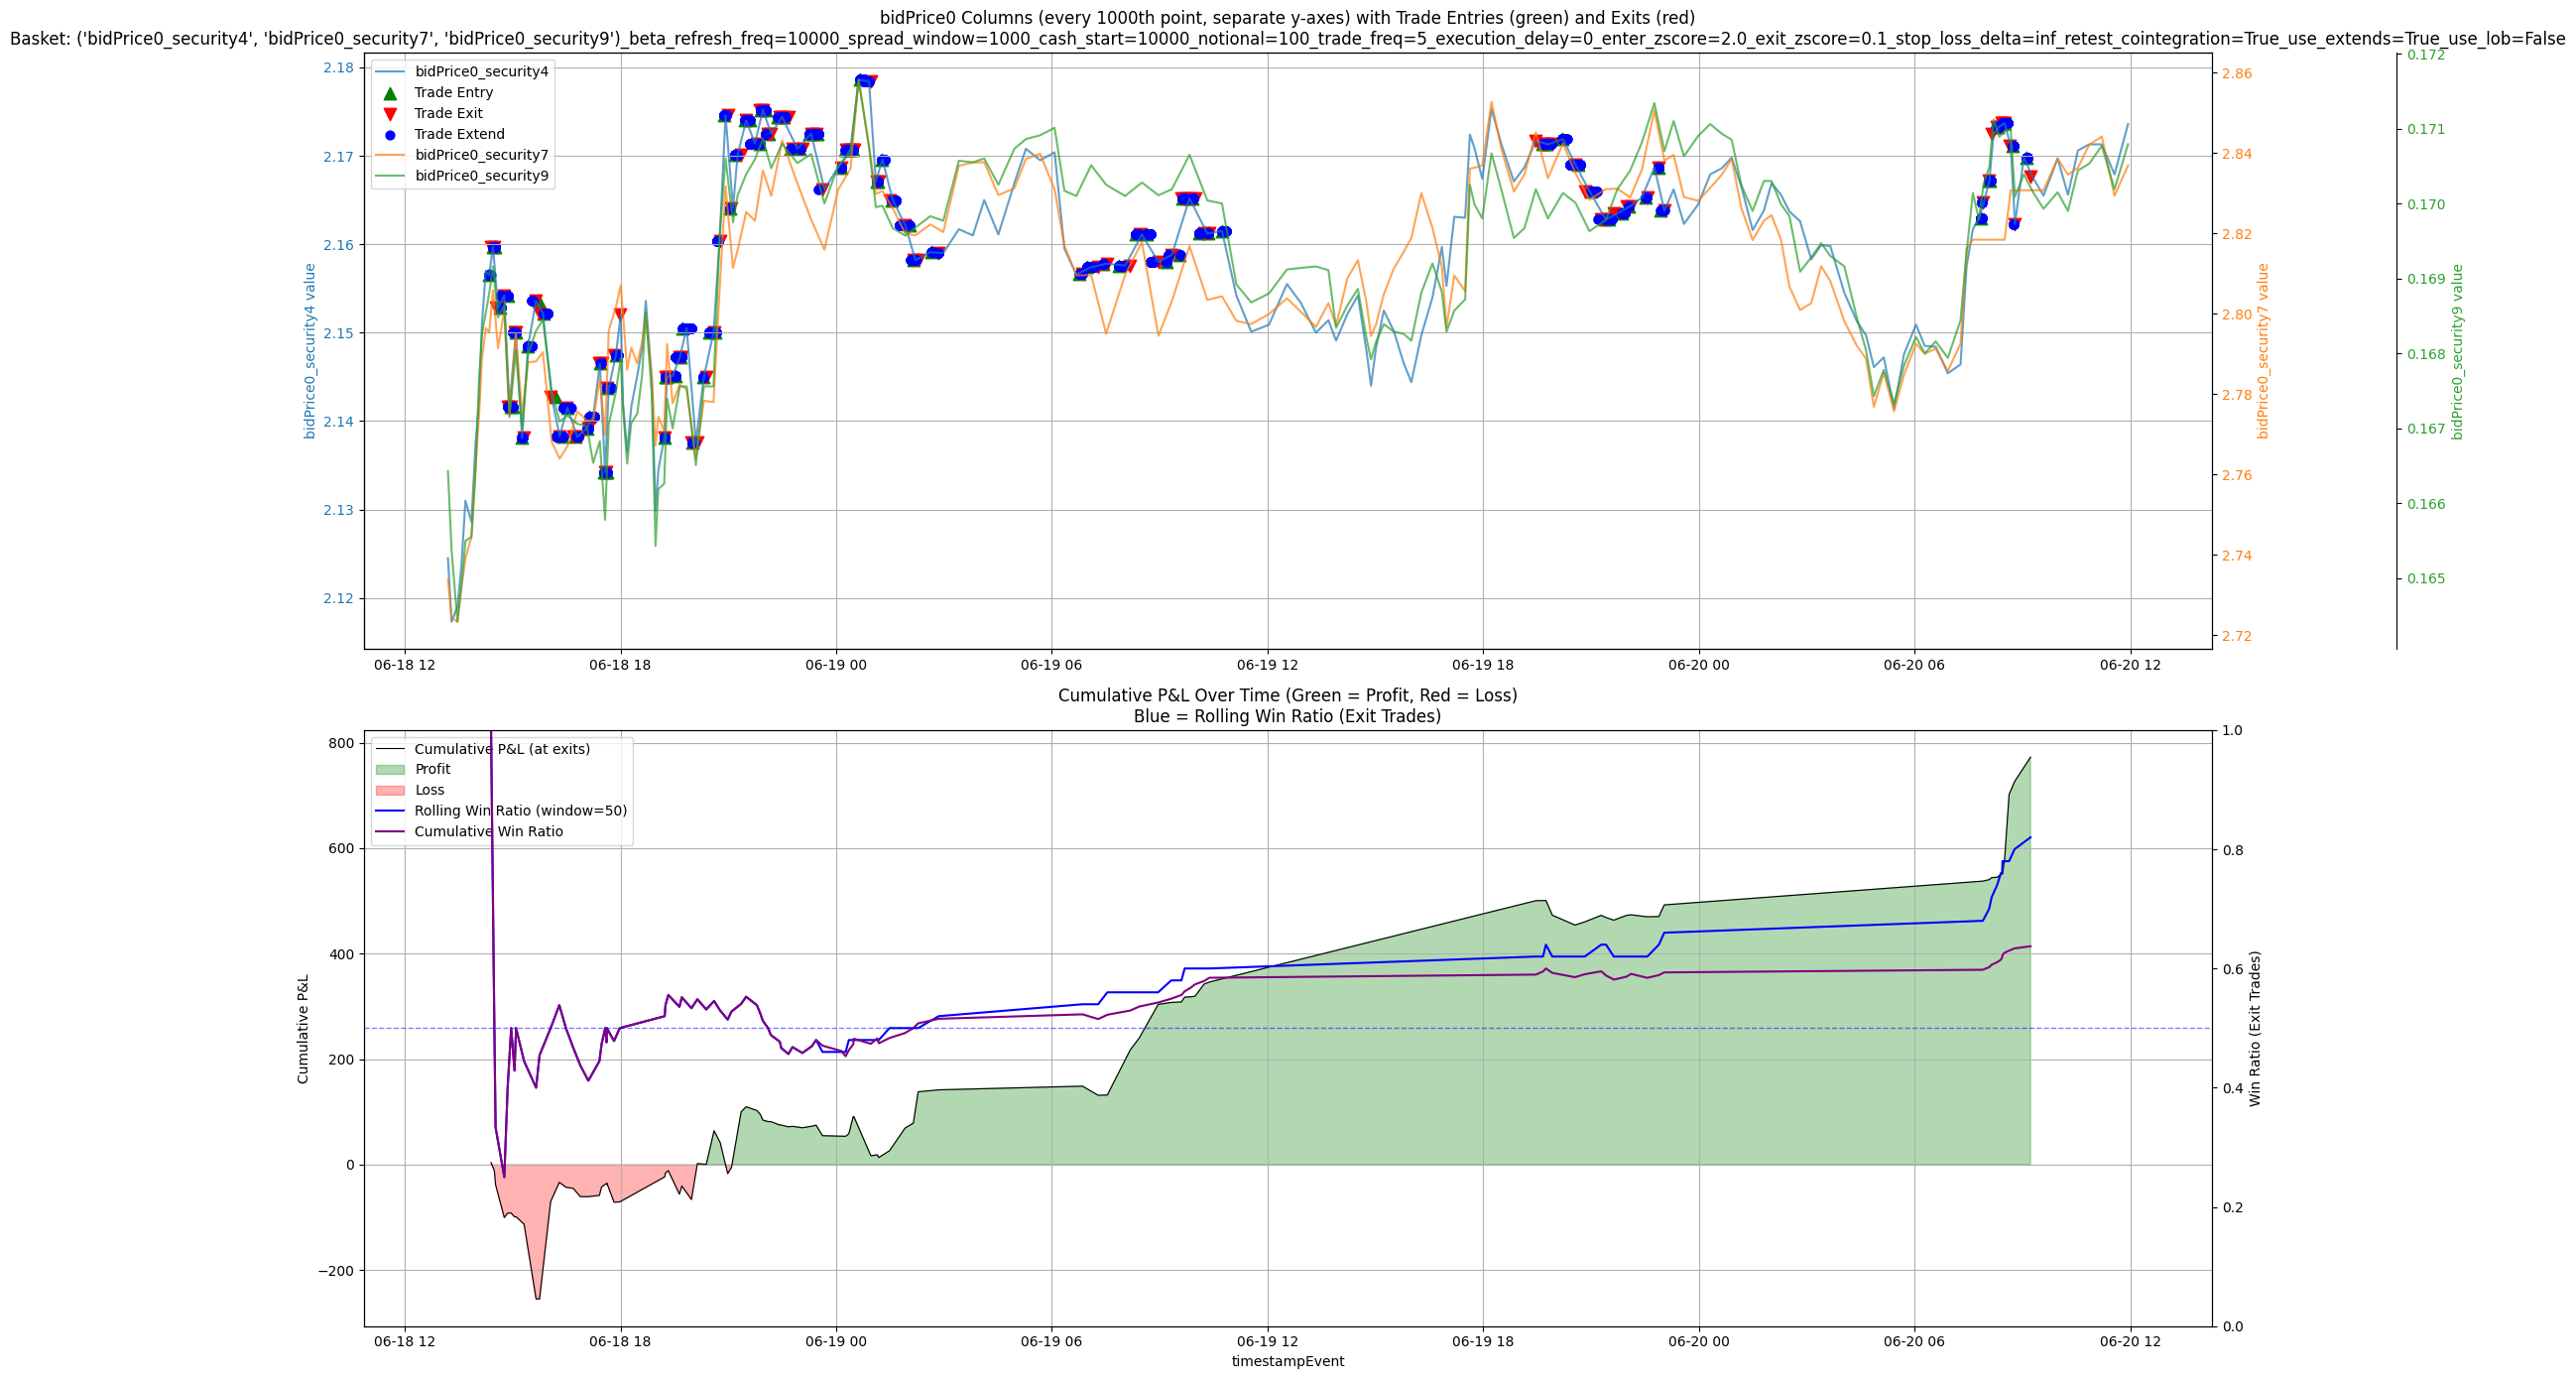

In [19]:
import matplotlib.pyplot as plt

def plot_bidprice0_and_trades(index):
    """
    Plots bidPrice0 columns and trade entries/exits for the basket at the given index in backtest_results.
    The basket key is included in the plot title.
    Each bidPrice0 column is plotted on its own y-axis (different scales).
    """
    # Get the basket's results at the given index
    basket_keys = list(backtest_results.keys())
    basket_key = basket_keys[index]
    result = backtest_results[basket_key]
    history_df = result['history_df']
    trade_log = result['trade_log']

    # Find all columns with "bidPrice0" in their name
    bid_cols = [col for col in history_df.columns if "bidPrice0" in col]

    # Plot every 1000th datapoint for all bidPrice0 columns against timestampEvent
    step = 1000
    sampled_idx = np.arange(0, len(history_df), step)

    # Make the second graph (ax2) larger both vertically and horizontally
    # We'll use gridspec to allocate more space to ax2, and increase the overall figure size
    fig = plt.figure(figsize=(22, 14))  # Larger figure
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 3])  # Make ax2 as tall as ax1

    # --- First graph: prices on different y-axes (scales) ---
    ax1 = fig.add_subplot(gs[0])
    axes = [ax1]
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # Plot the first bidPrice0 column on ax1
    if bid_cols:
        col = bid_cols[0]
        ax1.plot(
            history_df['timestampEvent'].iloc[sampled_idx],
            history_df[col].iloc[sampled_idx],
            label=col,
            color=color_cycle[0],
            alpha=0.7
        )
        ax1.set_ylabel(f'{col} value', color=color_cycle[0])
        ax1.tick_params(axis='y', labelcolor=color_cycle[0])
    # Plot additional bidPrice0 columns on their own y-axes
    for i, col in enumerate(bid_cols[1:], 1):
        ax_new = ax1.twinx()
        # Offset the spine to avoid overlap
        ax_new.spines["right"].set_position(("axes", 1 + 0.1 * (i-1)))
        # Make patch invisible (for clean overlay)
        ax_new.set_frame_on(True)
        ax_new.patch.set_visible(False)
        color = color_cycle[i % len(color_cycle)]
        ax_new.plot(
            history_df['timestampEvent'].iloc[sampled_idx],
            history_df[col].iloc[sampled_idx],
            label=col,
            color=color,
            alpha=0.7
        )
        ax_new.set_ylabel(f'{col} value', color=color)
        ax_new.tick_params(axis='y', labelcolor=color)
        axes.append(ax_new)
    # Mark trade entries, exits, and extends (on the closest sampled timestamp)
    if trade_log is not None and not trade_log.empty:
        # Find entry, exit, and extend indices
        entry_mask = trade_log['action'].str.contains('enter', case=False)
        exit_mask = trade_log['action'].str.contains('exit', case=False)
        extend_mask = trade_log['action'].str.contains('extend', case=False)

        # For each entry/exit/extend, find the closest sampled timestamp in history_df
        def get_closest_sampled_value(ts_list, col):
            # For each ts in ts_list, find the closest in sampled_idx
            values = []
            for ts in ts_list:
                # Find the index in history_df where timestampEvent == ts
                idx = history_df.index[history_df['timestampEvent'] == ts]
                if len(idx) == 0:
                    values.append(None)
                    continue
                idx = idx[0]
                # Find the closest sampled index
                closest_sampled = sampled_idx[np.abs(sampled_idx - idx).argmin()]
                values.append(history_df.loc[closest_sampled, col])
            return values

        # Plot entry/exit/extend points for the first bidPrice0 column only (for clarity)
        entry_y = get_closest_sampled_value(trade_log.loc[entry_mask, 'timestampEvent'], bid_cols[0])
        exit_y = get_closest_sampled_value(trade_log.loc[exit_mask, 'timestampEvent'], bid_cols[0])
        extend_y = get_closest_sampled_value(trade_log.loc[extend_mask, 'timestampEvent'], bid_cols[0])

        ax1.scatter(
            trade_log.loc[entry_mask, 'timestampEvent'],
            entry_y,
            color='green', marker='^', s=80, label='Trade Entry'
        )
        ax1.scatter(
            trade_log.loc[exit_mask, 'timestampEvent'],
            exit_y,
            color='red', marker='v', s=80, label='Trade Exit'
        )
        ax1.scatter(
            trade_log.loc[extend_mask, 'timestampEvent'],
            extend_y,
            color='blue', marker='o', s=40, label='Trade Extend'
        )

    # Compose a combined legend for all price axes
    handles, labels = [], []
    for ax in axes:
        h, l = ax.get_legend_handles_labels()
        handles += h
        labels += l
    # Remove duplicate labels
    from collections import OrderedDict
    by_label = OrderedDict(zip(labels, handles))
    ax1.legend(by_label.values(), by_label.keys(), loc='best')

    ax1.set_title(f'bidPrice0 Columns (every 1000th point, separate y-axes) with Trade Entries (green) and Exits (red)\nBasket: {basket_key}')
    ax1.grid(True)

    # --- Second graph: Cumulative P&L ---
    ax2 = fig.add_subplot(gs[1], sharex=ax1)

    # # Add vertical black dotted lines at timestamps where beta_refresh_vector_timestamp changes
    # if trade_log is not None and 'last_beta_vector_refresh' in trade_log.columns:
    #     # Find where the value changes (including the first value)
    #     beta_refresh_ts = trade_log['last_beta_vector_refresh']
    #     change_mask = beta_refresh_ts != beta_refresh_ts.shift(1)
    #     change_indices = trade_log.index[change_mask]
    #     change_timestamps = trade_log.loc[change_indices, 'timestampEvent']
    #     for ts in change_timestamps:
    #         ax2.axvline(ts, color='blue', linestyle=':', linewidth=1, alpha=0.7, label='_nolegend_')

    # Fast and visually clear cumulative P&L area chart
    if trade_log is not None and not trade_log.empty:
        trade_log = trade_log.copy()

        # --- Updated cumulative PL logic (from file_context_0) ---
        # Only consider enter and exit trades for PL calculation, ignore extend trades
        enter_exit_mask = trade_log['action'].str.contains('enter|exit', case=False)
        enter_exit_trades = trade_log[enter_exit_mask].reset_index(drop=True)

        # Find indices of exit trades
        exit_mask = enter_exit_trades['action'].str.contains('exit', case=False)
        exit_indices = enter_exit_trades.index[exit_mask].tolist()

        # For each exit, find the immediately preceding enter (assume always alternates)
        pl_list = []
        ticks_list = []
        for exit_idx in exit_indices:
            enter_idx = exit_idx - 1
            if enter_idx >= 0 and 'enter' in enter_exit_trades.loc[enter_idx, 'action']:
                pl = enter_exit_trades.loc[exit_idx, 'after_cash'] - enter_exit_trades.loc[enter_idx, 'before_cash']
                pl_list.append(pl)
                ticks_list.append(enter_exit_trades.loc[exit_idx, 'ticks_since_entry'])
            else:
                continue

        # Create a DataFrame for exit trades with calculated PL and ticks
        exit_trades = pd.DataFrame({
            'pl': pl_list,
            'ticks_since_entry': ticks_list
        })

        # For cumulative PL over time, reconstruct a time series using only exit trades
        # We'll plot cumulative sum of per-trade PL at the timestamp of each exit trade
        # Get the timestamps of exit trades from the original trade_log
        exit_trade_mask = trade_log['action'].str.contains('exit', case=False)
        exit_trade_timestamps = trade_log.loc[exit_trade_mask, 'timestampEvent'].values

        # Defensive: If number of exit_trades doesn't match number of exit_trade_timestamps, align to min length
        min_len = min(len(exit_trades), len(exit_trade_timestamps))
        cum_pl = pd.Series(exit_trades['pl'][:min_len]).cumsum().values
        timestamps = exit_trade_timestamps[:min_len]

        # Plot the cumulative P&L as a line (at exit trade timestamps)
        ax2.plot(timestamps, cum_pl, color='black', linewidth=0.8, label='Cumulative P&L (at exits)')

        # Fill area: green where cum_pl >= 0, red where cum_pl < 0
        ax2.fill_between(
            timestamps,
            cum_pl,
            0,
            where=(cum_pl >= 0),
            interpolate=True,
            color='green',
            alpha=0.3,
            label='Profit'
        )
        ax2.fill_between(
            timestamps,
            cum_pl,
            0,
            where=(cum_pl < 0),
            interpolate=True,
            color='red',
            alpha=0.3,
            label='Loss'
        )

        # --- Rolling win ratio for exit trades ---
        # A win is pl > 0, a loss is pl < 0, ignore pl == 0
        exit_trades['is_win'] = exit_trades['pl'] > 0
        exit_trades['is_loss'] = exit_trades['pl'] < 0

        # Rolling window size (number of exit trades)
        win_ratio_window = 50  # You can adjust this window size

        # Compute rolling win ratio (number of wins / (wins + losses)) for exit trades
        # Use min_periods=1 so the ratio is defined at the start
        rolling_wins = exit_trades['is_win'].rolling(window=win_ratio_window, min_periods=1).sum()
        rolling_losses = exit_trades['is_loss'].rolling(window=win_ratio_window, min_periods=1).sum()
        rolling_win_ratio = rolling_wins / (rolling_wins + rolling_losses)

        # Also compute cumulative win ratio (all time up to each point)
        cumulative_wins = exit_trades['is_win'].cumsum()
        cumulative_losses = exit_trades['is_loss'].cumsum()
        cumulative_win_ratio = cumulative_wins / (cumulative_wins + cumulative_losses)
        # For plotting, use the exit trade timestamps
        exit_timestamps = timestamps

        # Plot the rolling win ratio and cumulative win ratio on a secondary y-axis
        ax2b = ax2.twinx()
        ax2b.plot(
            exit_timestamps,
            rolling_win_ratio,
            color='blue',
            linewidth=1.5,
            label=f'Rolling Win Ratio (window={win_ratio_window})'
        )
        ax2b.plot(
            exit_timestamps,
            cumulative_win_ratio,
            color='purple',
            linewidth=1.5,
            linestyle='-',
            label='Cumulative Win Ratio'
        )
        ax2b.set_ylabel('Win Ratio (Exit Trades)')
        ax2b.set_ylim(0, 1)
        ax2b.grid(False)
        # Add a horizontal line at 0.5 for reference
        ax2b.axhline(0.5, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='_nolegend_')

        # Compose a combined legend for both axes
        handles1, labels1 = ax2.get_legend_handles_labels()
        handles2, labels2 = ax2b.get_legend_handles_labels()
        from collections import OrderedDict
        by_label = OrderedDict(zip(labels1 + labels2, handles1 + handles2))
        ax2.legend(by_label.values(), by_label.keys(), loc='best')

        ax2.set_ylabel('Cumulative P&L')
        ax2.set_title('Cumulative P&L Over Time (Green = Profit, Red = Loss)\nBlue = Rolling Win Ratio (Exit Trades)')
        ax2.grid(True)

    ax2.set_xlabel('timestampEvent')
    plt.tight_layout()
    plt.show()

# Find the index corresponding to the desired key
target_key = "('bidPrice0_security4', 'bidPrice0_security7', 'bidPrice0_security9')_beta_refresh_freq=10000_spread_window=1000_cash_start=10000_notional=100_trade_freq=5_execution_delay=0_enter_zscore=2.0_exit_zscore=0.1_stop_loss_delta=inf_retest_cointegration=True_use_extends=True_use_lob=False"
keys_list = list(backtest_results.keys())
index = keys_list.index(target_key)
plot_bidprice0_and_trades(index=index)

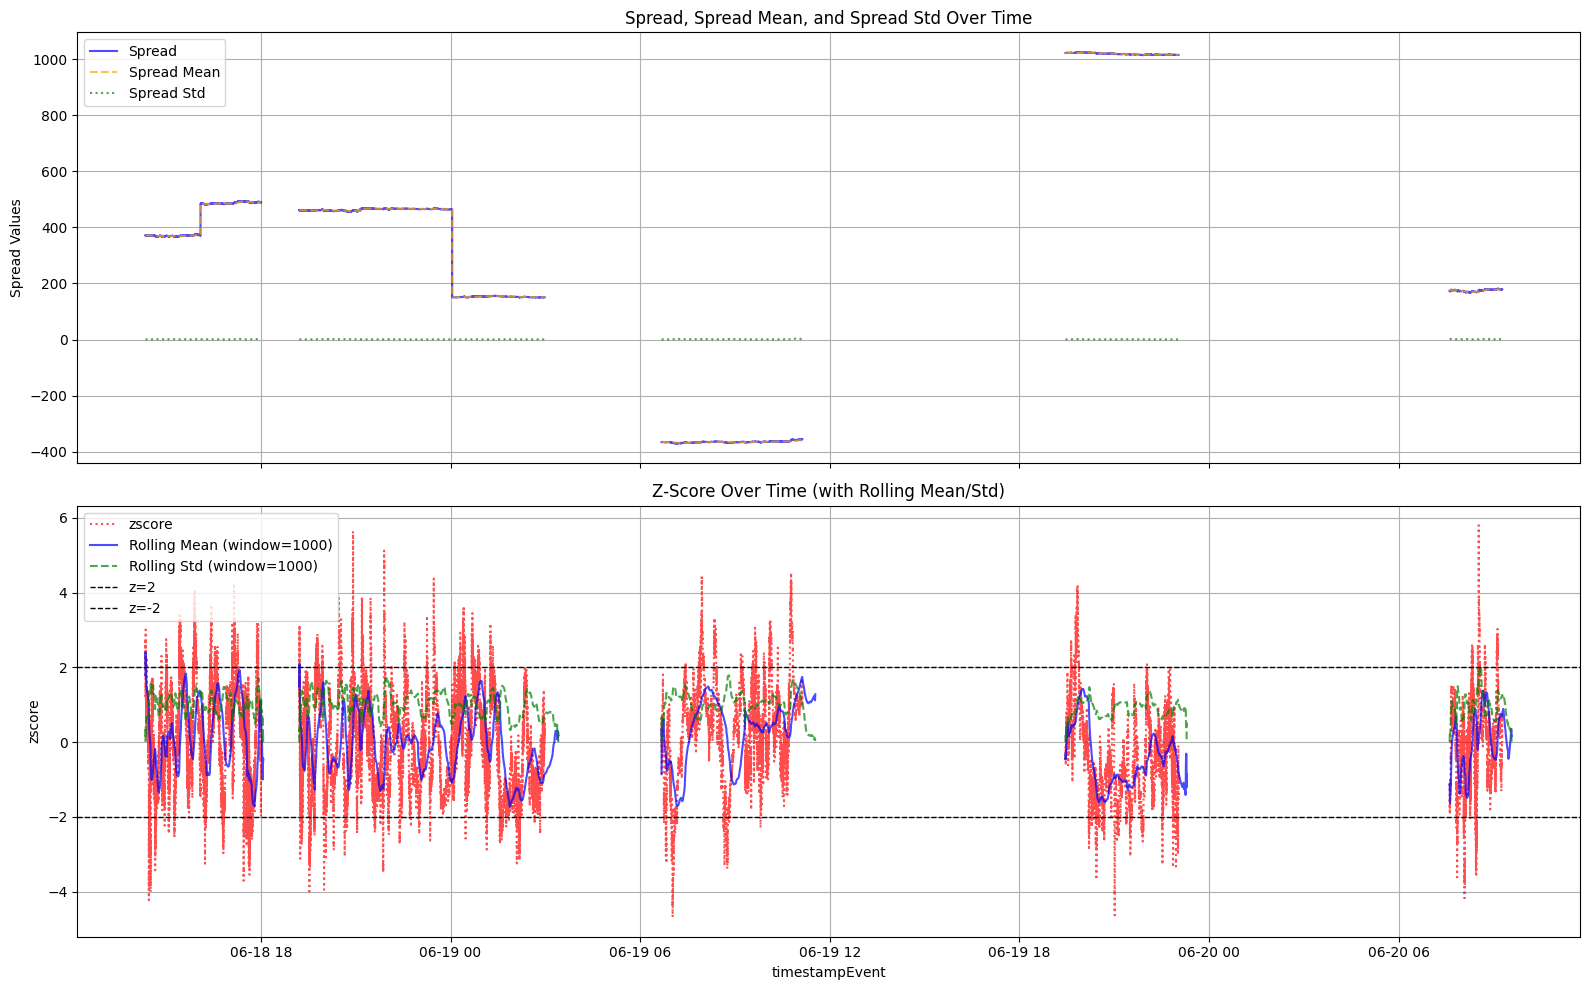

In [20]:
import matplotlib.pyplot as plt

def plot_spread_and_zscore(index):
    history_df = backtest_results[list(backtest_results.keys())[index]]['history_df']

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

    # Plot spread, mean, std on ax1
    ax1.plot(history_df['timestampEvent'], history_df['spread'], label='Spread', color='blue', alpha=0.7)
    ax1.plot(history_df['timestampEvent'], history_df['spread_mean'], label='Spread Mean', color='orange', linestyle='--', alpha=0.7)
    ax1.plot(history_df['timestampEvent'], history_df['spread_std'], label='Spread Std', color='green', linestyle=':', alpha=0.7)
    ax1.set_ylabel('Spread Values')
    ax1.set_title('Spread, Spread Mean, and Spread Std Over Time')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Display rolling mean and std of z_score
    window = 1000  # You can adjust the window size as needed
    zscore_rolling_mean = history_df['z_score'].rolling(window=window, min_periods=1).mean()
    zscore_rolling_std = history_df['z_score'].rolling(window=window, min_periods=1).std()

    # Plot zscore and its rolling mean/std on ax2
    ax2.plot(history_df['timestampEvent'], history_df['z_score'], label='zscore', color='red', linestyle=':', alpha=0.7)
    ax2.plot(history_df['timestampEvent'], zscore_rolling_mean, label=f'Rolling Mean (window={window})', color='blue', linestyle='-', alpha=0.7)
    ax2.plot(history_df['timestampEvent'], zscore_rolling_std, label=f'Rolling Std (window={window})', color='green', linestyle='--', alpha=0.7)
    ax2.axhline(y=2, color='black', linestyle='--', linewidth=1, alpha=0.99, label='z=2')
    ax2.axhline(y=-2, color='black', linestyle='--', linewidth=1, alpha=0.99, label='z=-2')
    ax2.set_ylabel('zscore')
    ax2.set_xlabel('timestampEvent')
    ax2.set_title('Z-Score Over Time (with Rolling Mean/Std)')
    ax2.legend(loc='upper left')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_spread_and_zscore(index)